In [50]:
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns
import os
from sklearn.cluster import KMeans
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing 
import random
from kneed import KneeLocator

In [2]:
# load properties mat file
wf_file = scipy.io.loadmat('wf_properties_final.mat')

In [3]:
# load metrics data for extracting valid units
metrics_data = pd.read_csv("MetricsDictatorDatasetDetails.csv")

In [9]:
units_filt = []
params_filt = []
file_names_filt = []
templates_filt = []
for i in range(64):
    f_name = wf_file['file_names'][0, i][0]
    # valid units for that recording according to isi_violation    
    valid_units = metrics_data[metrics_data['file_name'] == f_name][metrics_data['isi_violation'] <= 1.5]['unit'].tolist()
    for j in valid_units:
        try:
            # mean frequency, total amplitude and trough peak width params extract            
            mfr = wf_file['frequency'][0, i][0, j - 1][0][0]
            tot_amp = abs(wf_file['peak_distance'][0, i][0, j - 1][0][2])
            trough_peak_width = wf_file['peak_distance'][0, i][0, j - 1][0][5]
            params_filt.append([mfr, tot_amp, trough_peak_width])
            templates_filt.append((wf_file['templates'][0, i][0, j - 1][0, 0]))
            file_names_filt.append(f_name)
            units_filt.append(j)
        except Exception as e:
            print(e)
            print(f_names, valid, len(wf_file['frequency'][0, i][0]))

<ipython-input-9-4e6df9868766>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  valid_units = metrics_data[metrics_data['file_name'] == f_name][metrics_data['isi_violation'] <= 1.5]['unit'].tolist()


In [10]:
# format list within list to numpy array for running kmeans
params_filt_arr = np.array([np.array(xi) for xi in params_filt])
print("Number of valid units:", params_filt_arr.shape[0])

Number of valid units: 390


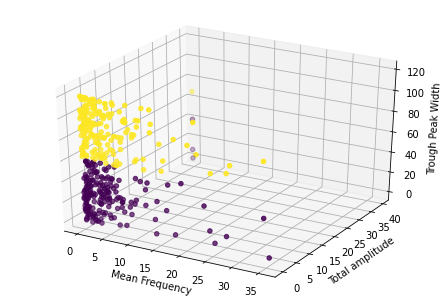

In [29]:
# run kMeans with cluster = 2
kmeans = None
kmeans = KMeans(n_clusters=2).fit_predict(params_filt_arr)
# 3D axis considering all parameters
fig=plt.figure()
ax = Axes3D(fig)
ax.scatter(params_filt_arr[:, 0], params_filt_arr[:, 1],  params_filt_arr[:, 2], c=kmeans)
ax.set_xlabel('Mean Frequency')
ax.set_ylabel('Total amplitude')
ax.set_zlabel('Trough Peak Width')
plt.show()

Text(0.5, 1.0, 'Total amplitude vs Trough Peak Width')

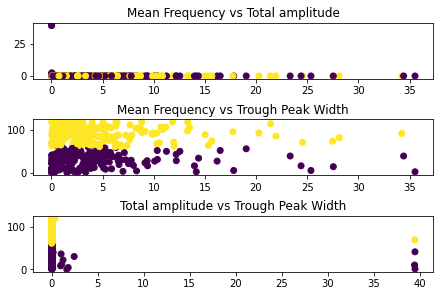

In [20]:
fig, axs = plt.subplots(3, 1, constrained_layout = True)
axs[0].scatter(params_filt_arr[:, 0], params_filt_arr[:, 1], c=kmeans)
axs[0].set_title('Mean Frequency vs Total amplitude')
axs[1].scatter(params_filt_arr[:, 0], params_filt_arr[:, 2], c=kmeans)
axs[1].set_title('Mean Frequency vs Trough Peak Width')
axs[2].scatter(params_filt_arr[:, 1], params_filt_arr[:, 2], c=kmeans)
axs[2].set_title('Total amplitude vs Trough Peak Width')

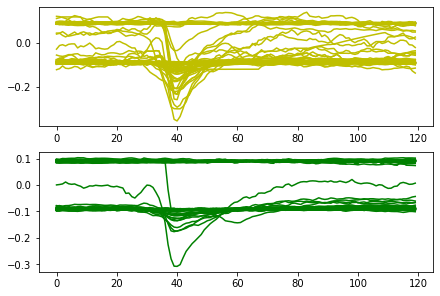

In [31]:
# plot normalized templates according to classification
fig, axs = plt.subplots(2, 1, constrained_layout = True)
temp_normalized = preprocessing.normalize(templates_filt, norm='l2')
for i in range(len(temp_normalized)):
    if kmeans[i] == 0:
        axs[0].plot(temp_normalized[i], 'y')
    else:
        axs[1].plot(temp_normalized[i], 'g')

In [45]:
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(params_filt_arr)
    sse.append(kmeans.inertia_)

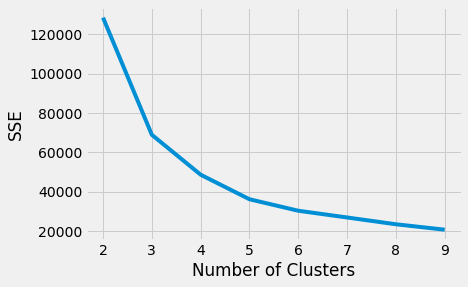

In [46]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), sse)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [48]:
kl = KneeLocator(range(2, 10), sse, curve="convex", direction="decreasing")
print(kl.elbow)

4


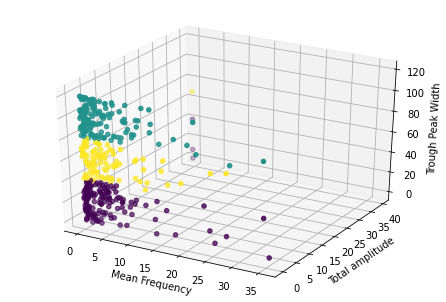

In [28]:
# running kMeans with cluster = 3
kmeans_3 = KMeans(n_clusters=3).fit_predict(params_filt_arr)
fig=plt.figure()
ax = Axes3D(fig)
ax.scatter(params_filt_arr[:, 0], params_filt_arr[:, 1],  params_filt_arr[:, 2], c=kmeans)
ax.set_xlabel('Mean Frequency')
ax.set_ylabel('Total amplitude')
ax.set_zlabel('Trough Peak Width')
plt.show()

In [12]:
# use all units instead of just valid ones and check difference with clustering - 1003 instead of 390
units = []
params = []
file_names = []
templates = []
for i in range(64):
    f_name = wf_file['file_names'][0, i][0]
    for j in range(len(wf_file['frequency'][0, i][0])):
        try:
            # mean frequency, total amplitude and trough peak width params extract            
            mfr = wf_file['frequency'][0, i][0, j ][0][0]
            tot_amp = abs(wf_file['peak_distance'][0, i][0, j ][0][2])
            trough_peak_width = wf_file['peak_distance'][0, i][0, j][0][5]
            params.append([mfr, tot_amp, trough_peak_width])
            templates.append((wf_file['templates'][0, i][0, j][0, 0]))
            file_names.append(f_name)
            units.append(j)
        except Exception as e:
            print(e)
            print(f_names, valid, len(wf_file['frequency'][0, i][0]))

In [14]:
params_arr = np.array([np.array(xi) for xi in params])
print("Number of units:", params_arr.shape[0])

Number of units: 1003


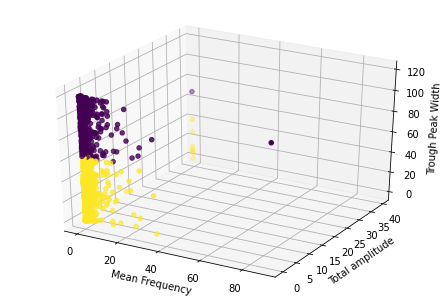

In [21]:
# kMeans with cluster = 2
kmeans = None
kmeans = KMeans(n_clusters=2).fit_predict(params_arr)
fig=plt.figure()
ax = Axes3D(fig)
ax.scatter(params_arr[:, 0], params_arr[:, 1],  params_arr[:, 2], c=kmeans)
ax.set_xlabel('Mean Frequency')
ax.set_ylabel('Total amplitude')
ax.set_zlabel('Trough Peak Width')
plt.show()

Text(0.5, 1.0, 'Total amplitude vs Trough Peak Width')

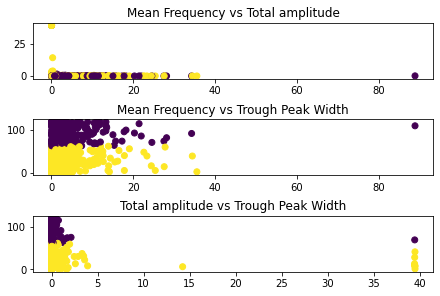

In [22]:
fig, axs = plt.subplots(3, 1, constrained_layout = True)
axs[0].scatter(params_arr[:, 0], params_arr[:, 1], c=kmeans)
axs[0].set_title('Mean Frequency vs Total amplitude')
axs[1].scatter(params_arr[:, 0], params_arr[:, 2], c=kmeans)
axs[1].set_title('Mean Frequency vs Trough Peak Width')
axs[2].scatter(params_arr[:, 1], params_arr[:, 2], c=kmeans)
axs[2].set_title('Total amplitude vs Trough Peak Width')